<a href="https://colab.research.google.com/github/mpizarrot/desafio-data-science-cla/blob/main/Desaf%C3%ADo_Data_Science_CLA_Caso_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación de librería pysentimiento

[Repositorio de pysentimiento](https://github.com/pysentimiento/pysentimiento)

In [1]:
!pip install pysentimiento

# Importación de librerías

In [77]:
import pandas as pd
from tqdm.auto import tqdm
from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Carga de dataset

In [83]:
df = pd.read_csv('dataset_Caso_2.csv')
df.head()

,texto_tweet
0,¡Atención! @ElMercurio_cl y @CajaLosAndes dest...
1,@CajaLosAndes el dia 9 de abril fui a @Cinepo...
2,"@CajaLosAndes Hola, Les envié DM para que me p..."
3,"@CajaLosAndes hola, necesito saber en que tram..."
4,Convenio DIVBIE - Caja Los Andes\n\nPara el pe...


# Análisis de sentimiento

In [86]:
# Crear el modelo
analyzer = create_analyzer(task="sentiment", lang="es")

# Preprocesar los tweets
df['texto_procesado'] = df['texto_tweet'].apply(lambda x: x.replace('\n', ' '))  # Quitar saltos de línea
df['texto_procesado'] = df['texto_procesado'].apply(preprocess_tweet)  # Aplicar preprocesamiento

# Análisis de sentimiento usando batches
sentimientos = []
for text in tqdm(df['texto_procesado']):
  sentimientos.append(analyzer.predict(text).output)

# Agregar los resultados al DataFrame
df['sentimiento'] = sentimientos

df.head()

  0%|          | 0/2649 [00:00<?, ?it/s]

,texto_tweet,texto_procesado,sentimiento
0,¡Atención! @ElMercurio_cl y @CajaLosAndes dest...,¡Atención! @usuario y @usuario destacaron a ha...,POS
1,@CajaLosAndes el dia 9 de abril fui a @Cinepo...,@usuario el dia 9 de abril fui a @usuario y n...,NEG
2,"@CajaLosAndes Hola, Les envié DM para que me p...","@usuario Hola, Les envié DM para que me puedan...",NEU
3,"@CajaLosAndes hola, necesito saber en que tram...","@usuario hola, necesito saber en que tramo de ...",NEU
4,Convenio DIVBIE - Caja Los Andes\n\nPara el pe...,Convenio DIVBIE - Caja Los Andes Para el pers...,NEU


#Resultados

Distribución de Sentimientos:
 sentimiento
NEG    52.283881
NEU    42.166855
POS     5.549264
Name: proportion, dtype: float64


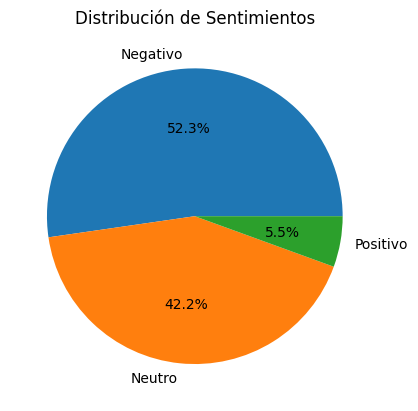

In [98]:
# Distribución de Sentimientos
sentiment_percentage = df['sentimiento'].value_counts(normalize=True) * 100
print("Distribución de Sentimientos:\n", sentiment_percentage)

# Visualización
fig, ax = plt.subplots()
ax.pie(sentiment_percentage, labels=["Negativo", "Neutro", "Positivo"], autopct='%1.1f%%')
ax.set_title('Distribución de Sentimientos')
plt.show()

## Ejemplos de Tweets Positivos, Neutros y Negativos

In [144]:
def get_examples(sentimiento, n=5):
  exs = df[df['sentimiento'] == sentimiento]['texto_tweet'].sample(n=n)
  if sentimiento == "POS":
    print(f"Ejemplos de Tweets Positivos:\n")
  elif sentimiento == "NEU":
    print(f"Ejemplos de Tweets Neutros:\n")
  else:
    print(f"Ejemplos de Tweets Negativos:\n")
  for i, tweet in enumerate(exs):
      print(f"{i+1}.- {tweet}\n")

get_examples("POS")

Ejemplos de Tweets Positivos:

1.- Te-cito a disfrutar de una rica tacita de felicidad. 🥰  
Porque todos los días te damos un 15% de descuento en la tienda online de https://t.co/XaSh4CGyby, pagando con tu Tapp. 
Conoce este y otros beneficios bonitos 💝 en https://t.co/hqT6y4q57R https://t.co/T5UNutJn3n

2.- RT @DeCrtv: Martín Vidaurre logró su cuarto triunfo consecutivo en la Copa del Mundo de Mountain Bike https://t.co/yAZuLAG8UW vía @CRTV Chi…

3.- 👏 ¡Llevamos nuestras experiencias educativas a otro nivel!

📲 Campus Fundación Telefónica Movistar ahora trabaja con @CajaLosAndes para poder llevar nuestros cursos de robótica, programación y más a sus afiliados.

👉 ¡Recortemos la brecha digital junt@s! https://t.co/QjoaPebE5f

4.- RT @fpaisdigital: ¡En #paísdigital nos unimos a @CajaLosAndes para lanzar un SOAP con VALOR SOCIAL! 

Conoce sus historias en el siguiente…

5.- @CajaLosAndes_Pe ha renovado su identidad y apunta a convertirse en el primer banco rural del Perú. Conoce más aquí

In [146]:
get_examples("NEU")

Ejemplos de Tweets Neutros:

1.- @ivanbelmarM1 @CajaLosAndes Hola @ivanbelmarM1 lamentamos lo que nos cuenta. Por favor, envíenos por DM/inbox sus datos (nombre, Rut, correo electrónico y teléfono) para que podamos ayudarle Quedamos a la espera.

2.- RT @MintrabChile: EN VIVO 🔴 Ministra @jeannette_jara, junto a la ministra @camila_vallejo, lanzan el #Sello40Horas y certifican a @Detacoop…

3.- @CajaLosAndes @FundChileEspana Les mande  DM  por TW  y face  aun sigo esperando .

4.- @jferreiq @SERNAC @CajaLosAndes Hola @jferreiq lamentamos lo que nos cuenta. Por favor, envíenos por DM/inbox sus datos (nombre, Rut, correo electrónico y teléfono) para que podamos ayudarle Quedamos a la espera.

5.- @Macarennnnnna19 En el link https://t.co/L9P0sLDHyg bien abajo saldrá "ver cupones", debe presionarlo. Luego le pedirá sus datos para ingresar (Rut y clave), saldrán sus cargas, selecciona a la niña y que siga el proceso. Le dará un código que cuando compre lo debe ingresar al pagar.



In [141]:
get_examples("NEG")

Ejemplos de Tweets Negativos:

1.- @CajaLosAndes Quién me puede dar solución al pago de mis licencias médicas aprobadas por COMPIN. Sigo esperando desde el 2019! Ya no tengo relación con el empleador.

2.- @CajaLosAndes Hola mi rut es 9.997.316-1 y necesito saber el saldo de mi deuda porque atravez de la App no me deja ya que olvide la clave y no puedo recuperarla necesito urgente esa informacion.

3.- Y @CajaLosAndes sigue sin atender trámite de cargas legales. Poca empatía con un joven padre de 2 niñas, que necesita acreditarlas urgente por motivos hospitalarios 🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️. @SUSESOChile https://t.co/mvV2JHuFb8

4.- @CajaLosAndes estimados aun esperando repuestas de ustedes por el tema de compra de entradas a piscinas temporadas las cuales ustedes me vendieron las entradas las cuales me cancelaron el mismo día,como es posible que la devolución de dinero la puedan hacer 15 días después y todo

5.- @CajaLosAndes Falta por mejorar, habilitan correos electrónicos que no responden. Ca

## WordClouds

In [114]:
# Archivo de stopwords en español
!wget https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt -O stopwords.txt

with open("stopwords.txt", 'r', encoding='utf-8') as file:
  stop_words = {line.strip() for line in file if line.strip()}

# Agregar más stopwords
aditional_stopwords = {'https', 't', 'co', 'RT', 'CajaLosAndes', 'hola', 'q', 'caja', 'andes'}
stop_words.update(aditional_stopwords)

def generar_wordcloud(texto):
  wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=50, width=800, height=400).generate(texto)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

--2024-08-23 23:18:55--  https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4244 (4.1K) [text/plain]
Saving to: ‘stopwords.txt’

stopwords.txt       100%[===================>]   4.14K  --.-KB/s    in 0s      

2024-08-23 23:18:55 (44.3 MB/s) - ‘stopwords.txt’ saved [4244/4244]



### Tweets positivos

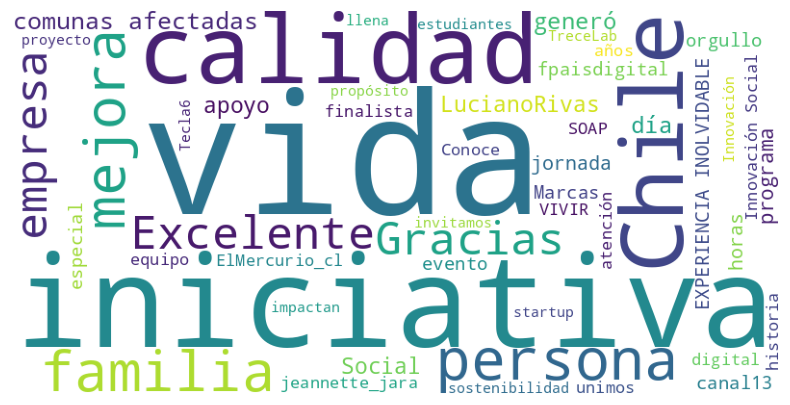

In [115]:
positivos_texto = ' '.join(df[df['sentimiento'] == 'POS']['texto_tweet'])
generar_wordcloud(positivos_texto)

###Tweets neutros

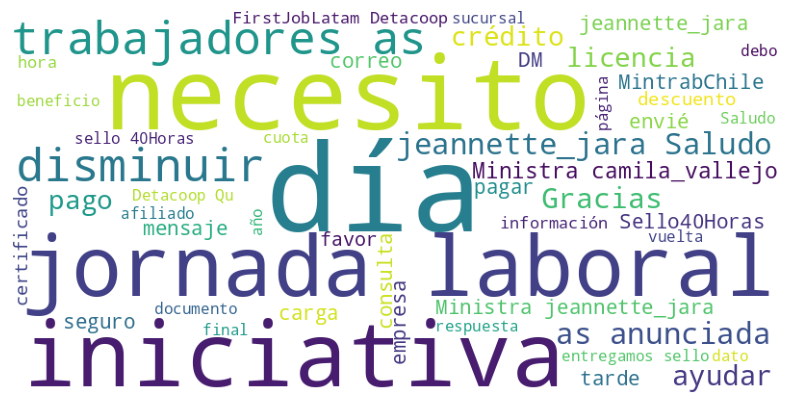

In [117]:
neutros_texto = ' '.join(df[df['sentimiento'] == 'NEU']['texto_tweet'])
generar_wordcloud(neutros_texto)

### Tweets negativos

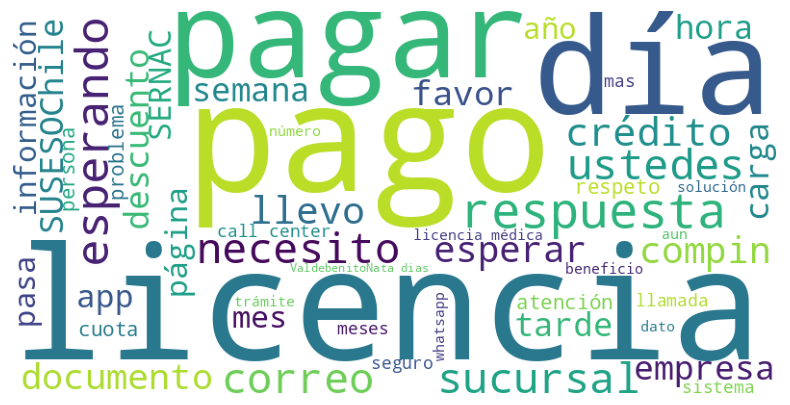

In [116]:
negativos_texto = ' '.join(df[df['sentimiento'] == 'NEG']['texto_tweet'])
generar_wordcloud(negativos_texto)

# Análisis final
Del gráfico de distribución de sentimientos, se aprecia que más de la mitad de los tweets son de connotación negativa, mientras que un 42.2% corresponde a tweets neutros y sólo un 5.5% corresponde a tweets positivos. Esto se puede evidenciar en algunos ejemplos de tweets y wordclouds por sentimiento, en donde la mayoría de comentarios negativos hacen referencia a reclamos por parte de los usuarios por pagos, licencias y tiempos de demora. En el caso de los tweets neutros, suelen ser consultas de los usuarios o respuestas a estas consultas. Por último, los tweets positivos suelen ser publicaciones celebrando hitos o acontecimientos, felicitaciones e invitaciones a eventos.